<a href="https://colab.research.google.com/github/FranciscoSanudo/Hello-World/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 133kB 2.8MB/s 


In [2]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
#My Twitter API Authentication Variables
consumer_key = 'qcyYqgzeKfHe0mMTUfizkE1PM'
consumer_secret = 'm5XmJszetNPJIkm1dz3Yw46bUDfX1BDMT5fICq8Go8dzXwNLIJ'
access_token = '2391974160-FqS2AJCWIP1UXd70klC8uXj0fFCdW0Xulqeu8SY'
access_token_secret = 'IOtjITcp6c7LmupmVMM5FJMIgbiV6oqnkxt1rN3Gue6WJ'

In [53]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

searchwhat = 'Mexico City'

tweets = api.search(str(searchwhat), count=200)


data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(10))


print(tweets[0].created_at)


Tweets
0  RT @LarrySchweikart: Correct Illinoisian: we r...
1  RT @UlrichJvV: Need this in all our cities! Me...
2  @marlo_music This September 21 in Mexico City ...
3  @PastameEnRosa\n@museodelchopo \nLos 23a√±os mu...
4  A Moment in Mexico: Ruptured City https://t.co...
5  please play sorry/6 minutes  as the fan reques...
6  BE412916822020241 \nRD#: HOO131216241812176912...
7  El 90% del √©xito se basa en insistir \n-\n-\n-...
8  @PastameEnRosa\n@museodelchopo \nA los23a√±os m...
9  RT @JaneKim: I am proud to author and win the ...

2019-09-19 04:40:57


In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
sid = SentimentIntensityAnalyzer()


listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)
data['polarity'] = se.values

display(data.head(100))

Tweets                                           polarity
0   RT @LarrySchweikart: Correct Illinoisian: we r...  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...
1   RT @UlrichJvV: Need this in all our cities! Me...  {'neg': 0.088, 'neu': 0.744, 'pos': 0.168, 'co...
2   @marlo_music This September 21 in Mexico City ...  {'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...
3   @PastameEnRosa\n@museodelchopo \nLos 23a√±os mu...  {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...
4   A Moment in Mexico: Ruptured City https://t.co...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5   please play sorry/6 minutes  as the fan reques...  {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...
6   BE412916822020241 \nRD#: HOO131216241812176912...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
7   El 90% del √©xito se basa en insistir \n-\n-\n-...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
8   @PastameEnRosa\n@museodelchopo \nA los23a√±os m...  {'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp...
9   RT @JaneKim: I am proud to author and win the ...  {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'comp...
10  1/2 Tomorrow, Mexico City will have a citywide...  {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...
11  RT @PresidentWalesa: Mexico City, przed spotka...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
12  If I leave the U.S. on a @Delta flight and hav...  {'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp...
13  It‚Äôs CRSSD ‚úàÔ∏è Dreamstate SoCal ‚úàÔ∏è Resistance M...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
14  RT @bisping: Just landed in Mexico City. It‚Äôs ...  {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...
15  RT @UlrichJvV: Need this in all our cities! Me...  {'neg': 0.088, 'neu': 0.744, 'pos': 0.168, 'co...
16  RT @PatrickGoldste4: Institut national de card...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
17  @PastameEnRosa\n@museodelchopo \nA los23a√±os m...  {'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...
18  #ufcfightnight Mexico City Sept 21 this Sabado...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
19  RT @BengalNewzWorld: Forensic scientists in #M...  {'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'comp...
20  RT @macias_lf: Spend 2+ weeks experiencing and...  {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...
21  RT @Jstevenward: Wtf, while about to board an ...  {'neg': 0.227, 'neu': 0.712, 'pos': 0.061, 'co...
22  RT @dionysusbizzle: JUSTIN LEGEND BIEBER DID T...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
23  RT @DevendraBanhart: Mexico City! https://t.co...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
24  Un tiro de suerte, lo s√©, es una √±o√±ada, pero ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
25  RT @NathanielParish: I think people in the US ...  {'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'comp...
26  RT @kairhapsody: Trends;\n#SuperKAI_Trailer re...  {'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'comp...
27  RT @bisping: Just landed in Mexico City. It‚Äôs ...  {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...
28  RT @DevendraBanhart: Mexico City! https://t.co...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
29  Gang, including boy, 14, arrested after killin...  {'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...
..                                                ...                                                ...
70  Hey Mexico City (Mexico)!  It's 9:11 at yours ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
71  RT @DevendraBanhart: Mexico City! https://t.co...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
72  I am available now in Mexico City, Mexico! To ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
73  RT @PatrickGoldste4: Institut national de card...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
74  RT @DevendraBanhart: Mexico City! https://t.co...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
75  RT @yuri_lop: At the beginning I thought that ...  {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...
76               Mexico City! https:

In [0]:
tweets=pd.DataFrame()

tweets["neg"]=[(sid.polarity_scores(i)['neg']) for i in data['Tweets']]
tweets["neu"]=[(sid.polarity_scores(i)['neu']) for i in data['Tweets']]
tweets["pos"]=[(sid.polarity_scores(i)['pos']) for i in data['Tweets']]
tweets["compound"]=[(sid.polarity_scores(i)['compound']) for i in data['Tweets']]

pos=0
neg=0
neu=0

##print(tweets["compound"])
for compound in tweets["compound"]:
  if compound >= 0.5:
    pos+=1
  elif compound <= -0.5:
    neg+=1
  else:
    neu+=1

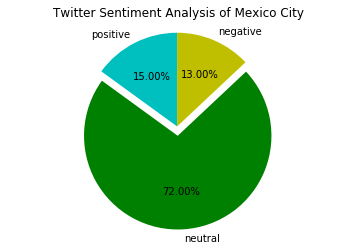

In [60]:

import matplotlib.pyplot as plt

labels = 'positive', 'neutral', 'negative'
sections = [pos, neu, neg]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Twitter Sentiment Analysis of ' + str(searchwhat))
plt.show()